In [1]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
rc('text',
   usetex=True)
sns.set_style('ticks')
sns.set_style({'font.family':'sans-serif'})
flatui = ['#002A5E', '#FD151B', '#8EBA42', '#348ABD', '#988ED5', '#BDB76B', '#8EBA42', '#FFB5B8']
sns.set_palette(flatui)
paper_rc = {'lines.linewidth': 2, 'lines.markersize': 10}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

# Parse Job Completion Times

In [2]:
import ast
import os
def parse_directory(directory_name):
    directory = os.fsencode(directory_name)
    policy_names = []
    all_job_completion_times = []
    for file in os.listdir(directory):
        file_name = os.fsdecode(file)
        policy_name = file_name.replace(".out", "")
        job_completion_times = None
        with open(os.path.join(directory_name, file_name), 'r') as f:
            parse_next_line = False
            for line in f:
                if parse_next_line:
                    line = line.strip()
                    job_completion_times = ast.literal_eval(line)
                    parse_next_line = False
                if line.strip() == "Job completion times:":
                    parse_next_line = True
        if job_completion_times is not None:
            policy_names.append(policy_name)
            all_job_completion_times.append(list(job_completion_times.values()))
    return all_job_completion_times, policy_names

# Plot Job Completion Time CDFs

In [3]:
def plot(all_job_completion_times, policy_names):
    plt.figure(figsize=(10, 3.5))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)

    for (job_completion_times, policy_name) in zip(
        all_job_completion_times, policy_names):
        job_completion_times.sort()
        cumulative_job_completion_times = [0.0]
        for x in job_completion_times:
            cumulative_job_completion_times.append(
                cumulative_job_completion_times[-1] + x)
        cumulative_percentages = [(x * 100.0) / cumulative_job_completion_times[-1]
                                  for x in cumulative_job_completion_times]

        policy_name = policy_name.replace("_", "\_")
        ax.plot([0] + job_completion_times,
                cumulative_percentages, label=policy_name)

    ax.set_xlabel("Job Completion Time")
    ax.set_ylabel("Cumulative \%age")
    ax.set_xlim([0, None])
    ax.set_ylim([0, 100])
    
    plt.legend()
    plt.show()

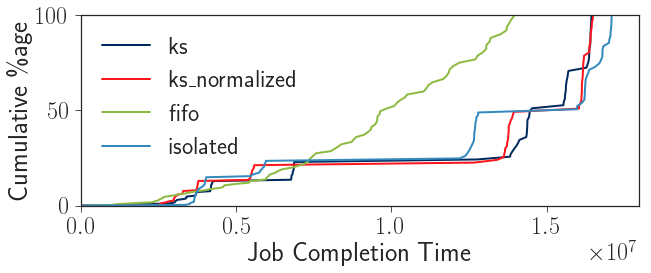

In [4]:
all_job_completion_times, policy_names = parse_directory("../logs/poisson_lam=2000/")
plot(all_job_completion_times, policy_names)